# ALGORITMO MACHINE LEARNING SUPERVISADO

## ARBOLES DE DECISIÓN

La idea ahora consiste en tratar de decidir si el salario de determinados empleados de determinada compañía supera o no los 100 mil euros dependiendo del trabajo y de sus estudios.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("salary.csv", sep=';')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
df.shape

(16, 4)

In [4]:
df.groupby(['company']).mean(),df.groupby(['degree']).mean(),df.groupby(['job']).mean()

(            salary_more_then_100k
 company                          
 abc pharma                   0.25
 facebook                     1.00
 google                       0.50,
            salary_more_then_100k
 degree                          
 bachelors                   0.50
 masters                     0.75,
                      salary_more_then_100k
 job                                       
 business manager                  0.833333
 computer programmer               0.600000
 sales executive                   0.400000)

Vemos como todos los empleados de facebook reciben un salario superior a 100.000

In [5]:
inputs = df.drop('salary_more_then_100k',axis='columns') #eliminamos la columna salario creando un nuevo dataframe
target = df['salary_more_then_100k'] #nos quedamos con la variable objetivo

In [6]:
from sklearn.preprocessing import LabelEncoder  #usamos este cuadro para convertir las variables categóricas en numéricas
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [7]:
inputs['company_n'] = le_company.fit_transform(inputs['company']) #añadimos estas nuevas variables numericas al dataframe inputs
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree']) 

la transformación se hace de manera alfabética

In [8]:
inputs[5:11]

,company,job,degree,company_n,job_n,degree_n
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1
10,facebook,sales executive,bachelors,1,2,0


In [9]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns') #eliminamos las no numéricas 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,train_size=0.8) #testearemos a posteriori 
#con el 20% de los datos

In [12]:
X_train, X_test

(    company_n  job_n  degree_n
 3           2      0         1
 8           0      0         0
 15          1      1         1
 10          1      2         0
 12          1      0         0
 0           2      2         0
 1           2      2         1
 13          1      0         1
 4           2      1         0
 6           0      2         1
 5           2      1         1
 7           0      1         0,
     company_n  job_n  degree_n
 14          1      1         0
 2           2      0         0
 9           0      0         1
 11          1      2         1)

In [13]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 0, 1], dtype=int64)

In [16]:
model.score(X_test,y_test) #50% de acierto, no parece un modelo adecuado

0.5

In [17]:
import graphviz #dibujar el arbol
tree.export_graphviz(model,out_file='dot_data',feature_names=X_train.columns, filled=True)

[Text(239.14285714285714, 489.24, 'company_n <= 0.5\nsamples = 12\nvalue = [6, 6]\nclass = No'),
 Text(119.57142857142857, 380.52000000000004, 'samples = 3\nvalue = [3, 0]\nclass = No'),
 Text(358.7142857142857, 380.52000000000004, 'company_n <= 1.5\nsamples = 9\nvalue = [3, 6]\nclass = Yes'),
 Text(239.14285714285714, 271.8, 'samples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(478.2857142857143, 271.8, 'degree_n <= 0.5\nsamples = 5\nvalue = [3, 2]\nclass = No'),
 Text(358.7142857142857, 163.08000000000004, 'samples = 2\nvalue = [2, 0]\nclass = No'),
 Text(597.8571428571429, 163.08000000000004, 'job_n <= 1.5\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(478.2857142857143, 54.360000000000014, 'samples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(717.4285714285714, 54.360000000000014, 'samples = 1\nvalue = [1, 0]\nclass = No')]

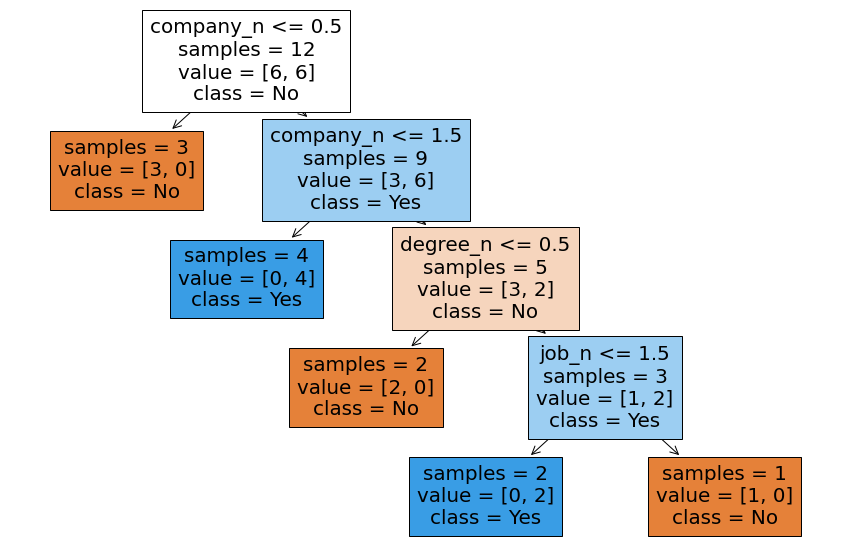

In [18]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=X_train.columns,class_names= ['No','Yes'],filled=True,impurity=False,)